# Part 2
#### 
#### Dependencies:

In [1]:
import numpy as np
import scipy as scipy
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import scipy.stats as stats


#### 
#### Load, prepare and visualize data

In [2]:
DATA_DIR = "./"
data1_xtest = np.load(DATA_DIR + "data1_lab4/data1_xtest.npy")
data1_xtrain = np.load(DATA_DIR + "data1_lab4/data1_xtrain.npy")
data1_ytest = np.load(DATA_DIR + "data1_lab4/data1_ytest.npy")
data1_ytrain = np.load(DATA_DIR + "data1_lab4/data1_ytrain.npy")

classes, counts = np.unique(data1_ytrain, return_counts=True)


In [3]:
data1_xtrain_split = {}
data1_xtest_split = {}
for c in classes:
    data1_xtrain_split[c] = data1_xtrain[np.where(data1_ytrain == c),:][0]
    data1_xtest_split[c] = data1_xtest[np.where(data1_ytest == c),:][0]
    

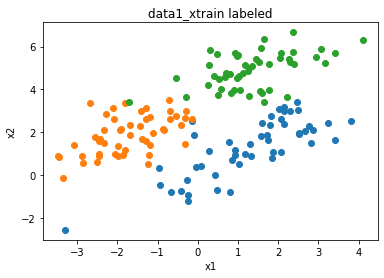

In [4]:
for c in data1_xtrain_split:
    x1 = data1_xtrain_split[c][:,0]
    x2 = data1_xtrain_split[c][:,1]
    plt.scatter(x1,x2)
    
plt.title('data1_xtrain labeled')
plt.xlabel('x1')
plt.ylabel('x2')

plt.show()

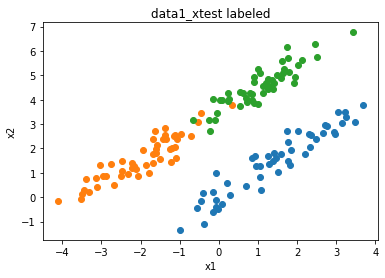

In [5]:
for c in data1_xtest_split:
    x1 = data1_xtest_split[c][:,0]
    x2 = data1_xtest_split[c][:,1]
    plt.scatter(x1,x2)
    
plt.title('data1_xtest labeled')
plt.xlabel('x1')
plt.ylabel('x2')

plt.show()

#### 
#### Calculate mean and variance for each class

In [6]:
mean = {}
var = {}

for c in data1_xtest_split:
    mean[c] = np.mean(data1_xtest_split[c], axis=0)
    var[c] = np.var(data1_xtest_split[c], axis=0)
    

#### 
#### Naive Bayes Classifier

In [7]:
# Takes single values
def p(x, mean, var):          
    return (1 / np.sqrt(2 * np.pi * var)) * np.exp((-(x-mean)**2)/(2*var))


# Takes vectors
def posteriorNaiveBayes(X, mean, var):
    posterior = p(X[0], mean[0], var[0])
    
    for i in range(1, len(X)):
        posterior *= p(X[i], mean[i], var[i])
        
    return posterior


# Takes dataset
def predictNaiveBayes(data_x, classes, mean, var):
    
    predictions = []
    for i in range(len(data_x)):
        
        posteriors = []
        for c in classes:
            posteriors.append(posteriorNaiveBayes(data_x[i], mean[c], var[c]))
        
        predictions.append(classes[np.argmax(posteriors)])
    
    return predictions


#### 
#### Test data predicted with Naive Bayes Classifier

Error percentage: 0.040000000000000036


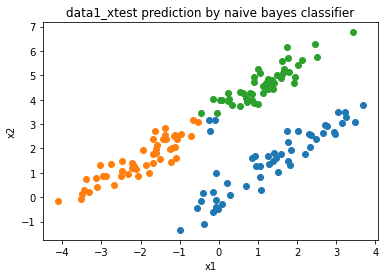

In [8]:
predictions = predictNaiveBayes(data1_xtest, classes, mean, var)
error_percentage = 1 - accuracy_score(data1_ytest, predictions)
print("Error percentage:", error_percentage)

data1_xtest_pred_split = {}

for c in classes:
    data1_xtest_pred = data1_xtest[np.where(predictions == c),:][0]
    plt.scatter(data1_xtest_pred[:,0],data1_xtest_pred[:,1])
        
plt.title('data1_xtest prediction by naive bayes classifier')
plt.xlabel('x1')
plt.ylabel('x2')

plt.show()

#### 
#### Calculate covariance for each class

In [9]:
cov = {}

for c in data1_xtest_split:
    cov[c] = np.cov(data1_xtest_split[c],rowvar=False)


#### 
#### Bayes Classifier

In [10]:
# Takes dataset
def predictBayes(data_x, classes, mean, cov):
    predictions = []
    for i in range(len(data_x)):
        posterior = []
        for c in classes:
            posterior.append(stats.multivariate_normal(mean[c],cov[c]).pdf(data_x[i]))
        
        predictions.append(classes[np.argmax(posterior)])
    
    return predictions


#### 
#### Test data predicted with Bayes Classifier

Error percentage: 0.026666666666666616


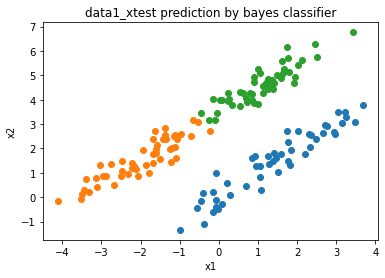

In [11]:
predictions = predictBayes(data1_xtest, classes, mean, cov)
error_percentage = 1 - accuracy_score(data1_ytest, predictions)
print("Error percentage:", error_percentage)

data1_xtest_pred_split = {}

for c in classes:
    data1_xtest_pred = data1_xtest[np.where(predictions == c),:][0]
    plt.scatter(data1_xtest_pred[:,0],data1_xtest_pred[:,1])
        
plt.title('data1_xtest prediction by bayes classifier')
plt.xlabel('x1')
plt.ylabel('x2')

plt.show()